<a href="https://colab.research.google.com/github/Moony-H/ML-Learning/blob/master/regression_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
!pip install yfinance
import yfinance as yf


     |████████████████████████████████| 35.0MB 124kB/s 
     |████████████████████████████████| 245kB 73.1MB/s 
     |████████████████████████████████| 890kB 64.0MB/s 
  Created wheel for markdown: filename=Markdown-2.2.0-cp36-none-any.whl size=136269 sha256=c4fbf271d77f2cd0e525acdcc502d00b47b4791dc122d7e9c8656b30a7ddcd8a
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=19810b1f4d26ec521ac738c96608f3bc5341424d93c275f3d872bdb8918b1b7f
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built markdown html5lib
ERROR: tensorboard 2.3.0 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installatio

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

     |████████████████████████████████| 5.5MB 9.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=f476f9d8ed416a9cc2aafa30153fb3f02a90f79a03edf151a2c8db351e6e008a
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
rawDatas=yf.download("GOOG",start="2020-07-31",end="2020-10-10")
print(rawDatas)

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close   Volume
Date                                  ...                      
2020-07-31  1505.010010  1508.949951  ...  1482.959961  3439900
2020-08-03  1486.640015  1490.469971  ...  1474.449951  2330200
2020-08-04  1476.569946  1485.560059  ...  1464.969971  1903500
2020-08-05  1469.300049  1482.410034  ...  1473.609985  1979500
2020-08-06  1471.750000  1502.390015  ...  1500.099976  1995400
2020-08-07  1500.000000  1516.844971  ...  1494.489990  1576600
2020-08-10  1487.180054  1504.074951  ...  1496.099976  1289300
2020-08-11  1492.439941  1510.000000  ...  1480.319946  1454400
2020-08-12  1485.579956  1512.385986  ...  1506.619995  1437700
2020-08-13  1510.339966  1537.250000  ...  1518.449951  1455200
2020-08-14  1515.660034  1521.900024  ...  1507.729980  1354800
2020-08-17  1514.670044  1525.609985  ...  1517.979980  1378300
2020-08-18  1526.180054  1562.46997

In [ ]:
# convert dataframe to numpy
npData =rawDatas.values
print(npData)

[[1.50501001e+03 1.50894995e+03 1.45403003e+03 1.48295996e+03
  1.48295996e+03 3.43990000e+06]
 [1.48664001e+03 1.49046997e+03 1.46564001e+03 1.47444995e+03
  1.47444995e+03 2.33020000e+06]
 [1.47656995e+03 1.48556006e+03 1.45865002e+03 1.46496997e+03
  1.46496997e+03 1.90350000e+06]
 [1.46930005e+03 1.48241003e+03 1.46345996e+03 1.47360999e+03
  1.47360999e+03 1.97950000e+06]
 [1.47175000e+03 1.50239001e+03 1.46600000e+03 1.50009998e+03
  1.50009998e+03 1.99540000e+06]
 [1.50000000e+03 1.51684497e+03 1.48164001e+03 1.49448999e+03
  1.49448999e+03 1.57660000e+06]
 [1.48718005e+03 1.50407495e+03 1.47307996e+03 1.49609998e+03
  1.49609998e+03 1.28930000e+06]
 [1.49243994e+03 1.51000000e+03 1.47800000e+03 1.48031995e+03
  1.48031995e+03 1.45440000e+06]
 [1.48557996e+03 1.51238599e+03 1.48525000e+03 1.50662000e+03
  1.50662000e+03 1.43770000e+06]
 [1.51033997e+03 1.53725000e+03 1.50800500e+03 1.51844995e+03
  1.51844995e+03 1.45520000e+06]
 [1.51566003e+03 1.52190002e+03 1.50288000e+03 1.5

In [ ]:
DataShapes = np.shape(npData)
DataShapes

(50, 6)

In [ ]:
numpyDataShape = npData.shape
numpyDataShape

(50, 6)

In [ ]:
# only close value
closeValues = npData[:,3:4]
print(closeValues)

[[1482.95996094]
 [1474.44995117]
 [1464.9699707 ]
 [1473.60998535]
 [1500.09997559]
 [1494.48999023]
 [1496.09997559]
 [1480.31994629]
 [1506.61999512]
 [1518.44995117]
 [1507.72998047]
 [1517.97998047]
 [1558.59997559]
 [1547.5300293 ]
 [1581.75      ]
 [1580.42004395]
 [1588.19995117]
 [1608.2199707 ]
 [1652.38000488]
 [1634.32995605]
 [1644.41003418]
 [1634.18005371]
 [1660.70996094]
 [1728.2800293 ]
 [1641.83996582]
 [1591.04003906]
 [1532.39001465]
 [1556.95996094]
 [1532.02001953]
 [1520.7199707 ]
 [1519.2800293 ]
 [1541.43994141]
 [1520.90002441]
 [1495.5300293 ]
 [1459.98999023]
 [1431.16003418]
 [1465.45996094]
 [1415.20996094]
 [1428.29003906]
 [1444.95996094]
 [1464.52001953]
 [1469.32995605]
 [1469.59997559]
 [1490.08996582]
 [1458.42004395]
 [1486.02001953]
 [1453.43994141]
 [1460.29003906]
 [1485.93005371]
 [1515.2199707 ]]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


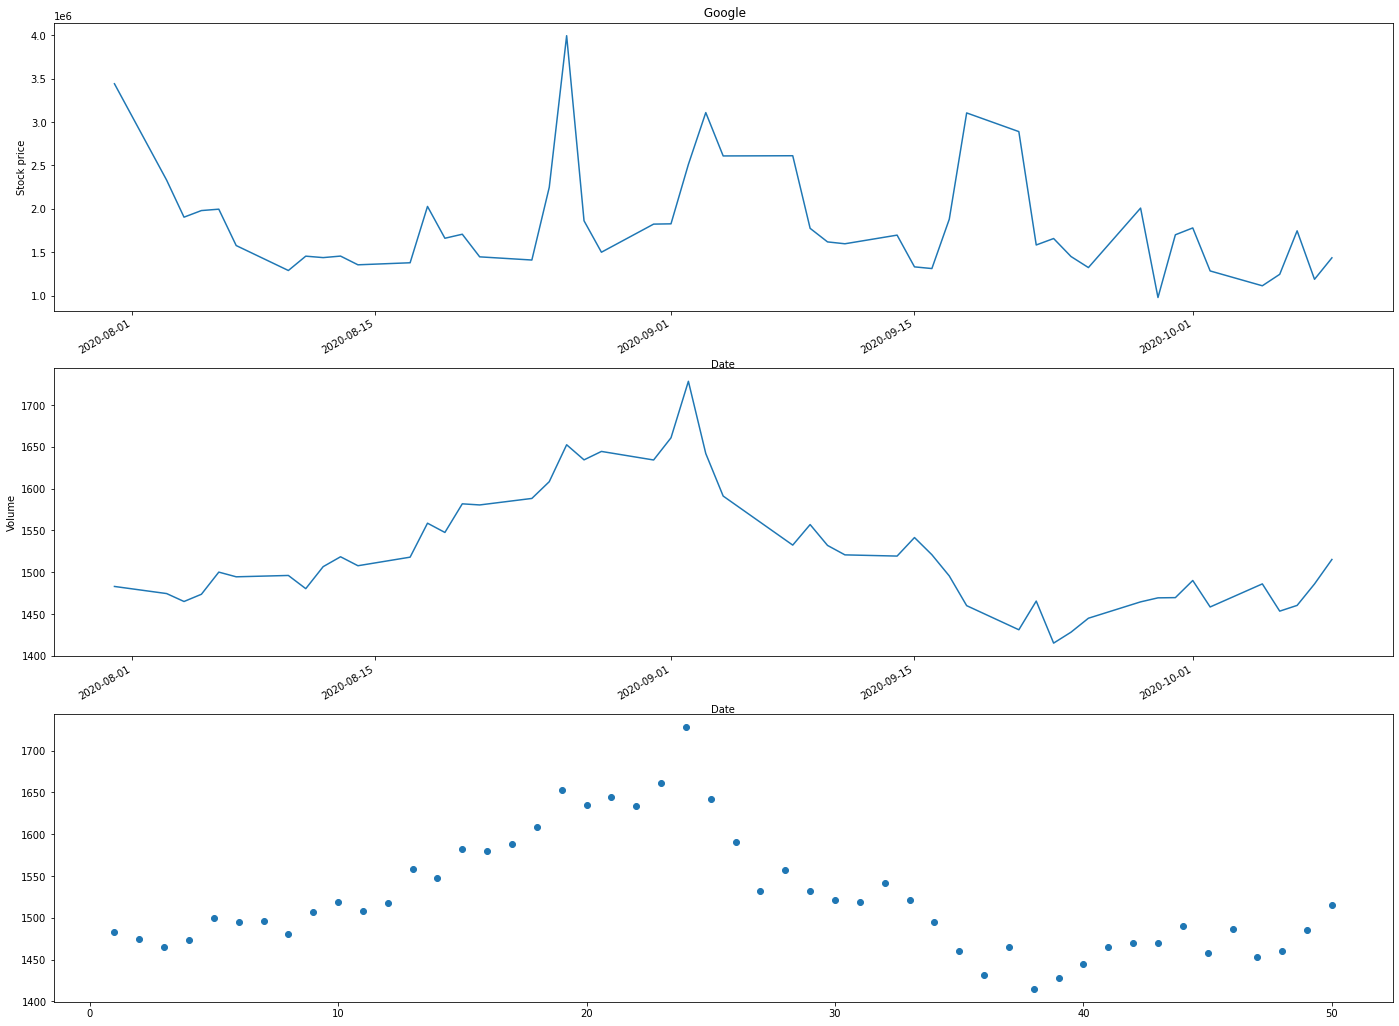

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(24,20))
rawDatas.Close.plot(ax=ax2)
ax1.set(title = ' Google',
          ylabel = 'Stock price')

rawDatas.Volume.plot(ax=ax1)
ax2.set(ylabel = 'Volume')

xval=(np.arange(50))+1
print(xval)
ax3.scatter(xval, closeValues)

In [ ]:
x_data = np.arange(50)
y_data = closeValues
print("x_data = ", x_data)
print("y_data = ", y_data)

x_data =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
y_data =  [[1482.95996094]
 [1474.44995117]
 [1464.9699707 ]
 [1473.60998535]
 [1500.09997559]
 [1494.48999023]
 [1496.09997559]
 [1480.31994629]
 [1506.61999512]
 [1518.44995117]
 [1507.72998047]
 [1517.97998047]
 [1558.59997559]
 [1547.5300293 ]
 [1581.75      ]
 [1580.42004395]
 [1588.19995117]
 [1608.2199707 ]
 [1652.38000488]
 [1634.32995605]
 [1644.41003418]
 [1634.18005371]
 [1660.70996094]
 [1728.2800293 ]
 [1641.83996582]
 [1591.04003906]
 [1532.39001465]
 [1556.95996094]
 [1532.02001953]
 [1520.7199707 ]
 [1519.2800293 ]
 [1541.43994141]
 [1520.90002441]
 [1495.5300293 ]
 [1459.98999023]
 [1431.16003418]
 [1465.45996094]
 [1415.20996094]
 [1428.29003906]
 [1444.95996094]
 [1464.52001953]
 [1469.32995605]
 [1469.59997559]
 [1490.08996582]
 [1458.42004395]
 [1486.02001953]
 [1453.43994141]
 [1460.29003906]
 [1485.930

In [ ]:
x_data = np.arange(50)
x_data = (x_data+1).tolist()
y_data = closeValues.ravel()
y_data = (y_data).tolist()
print("x_data = ", x_data)
print("y_data = ", y_data)
print(len(y_data))

x_data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
y_data =  [1482.9599609375, 1474.449951171875, 1464.969970703125, 1473.6099853515625, 1500.0999755859375, 1494.489990234375, 1496.0999755859375, 1480.3199462890625, 1506.6199951171875, 1518.449951171875, 1507.72998046875, 1517.97998046875, 1558.5999755859375, 1547.530029296875, 1581.75, 1580.4200439453125, 1588.199951171875, 1608.219970703125, 1652.3800048828125, 1634.3299560546875, 1644.4100341796875, 1634.1800537109375, 1660.7099609375, 1728.280029296875, 1641.8399658203125, 1591.0400390625, 1532.3900146484375, 1556.9599609375, 1532.02001953125, 1520.719970703125, 1519.280029296875, 1541.43994140625, 1520.9000244140625, 1495.530029296875, 1459.989990234375, 1431.1600341796875, 1465.4599609375, 1415.2099609375, 1428.2900390625, 1444.9599609375, 1464.52001953125, 1469.3299560546875, 1469

In [ ]:
# Linear Regression for stock forecasting

#예측할 지점 미리 출력

ActualValue=y_data[10]

#리니어한 구간 설정
x_data=x_data[:10]
y_data=y_data[:10]


# Try to find values for W and b to compute Y = W * X + b
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# placeholders for a tensor that will be always fed using feed_dict

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis is X * W + b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run(
            [train, cost, W, b], feed_dict={X:x_data , Y:y_data}
        )
        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

    # Testing our model
    # 15 미만으로 array를 넣었으니 예상값은 15
    print(" 예상 값: " ,sess.run(hypothesis, feed_dict={X: [10.]}))
    print(' 실제 값:',ActualValue)


0 2199957.5 [164.33809] [32.370438]
100 189949.34 [138.76434] [529.2072]
200 81928.56 [92.52058] [851.148]
300 35373.008 [62.161743] [1062.5009]
400 15308.158 [42.23128] [1201.2532]
500 6660.4775 [29.14703] [1292.3434]
600 2933.4126 [20.55721] [1352.1442]
700 1327.1072 [14.918066] [1391.403]
800 634.81177 [11.215999] [1417.1761]
900 336.446 [8.785655] [1434.0957]
1000 207.84798 [7.1900716] [1445.2039]
1100 152.42538 [6.1426263] [1452.496]
1200 128.53897 [5.454972] [1457.2833]
1300 118.242676 [5.0034924] [1460.4265]
1400 113.80516 [4.707083] [1462.49]
1500 111.89268 [4.512485] [1463.8447]
1600 111.0687 [4.384793] [1464.7338]
1700 110.71366 [4.300933] [1465.3176]
1800 110.560585 [4.245892] [1465.7007]
1900 110.494644 [4.2097893] [1465.9521]
2000 110.466064 [4.1860776] [1466.1172]
 예상 값:  [1507.9779]
 실제 값: 1507.72998046875
